In [1]:
# Instalando bibliotecas necessárias
#pip install -U pandas-profiling

#Foi necessário instalar -> pip install ipywidgets

In [5]:
# Instlação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

In [6]:
# Fazendo a leitura do dataset com o pandas
# Esse dataset é um conjunto de dados de seguro de saúde dos EUA
df_seguro = pd.read_csv('insurance.csv')

In [4]:
# Configurações necessárias para o Pandas Profile
from pandas_profiling import ProfileReport
profile = ProfileReport(df_seguro, title="Relatório Plano de Saúde", html={'style':{'full_width': True}})
profile.to_notebook_iframe()
profile.to_file(output_file='Relatório Plano de Saúde.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [249]:
df_seguro.shape

(1338, 7)

In [250]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [251]:
# tipagem dos dados
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df_seguro.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
# Visualzando as colunas
df_seguro.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Pandas

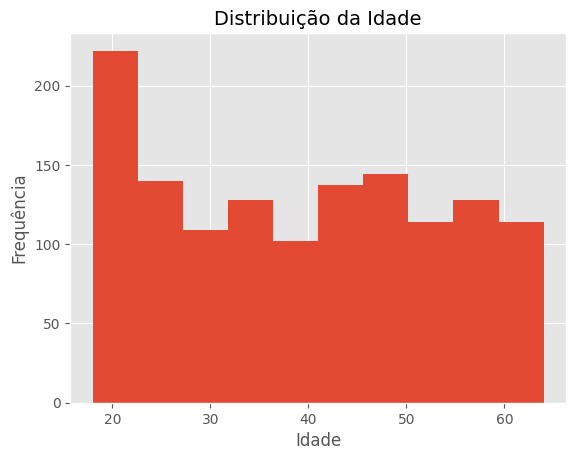

In [168]:
# Nesse gráfico visualisamos a quantidade de pessoas que contratam o seguro de acordo com a idade

ax_hist = df_seguro['age'].plot(kind = 'hist',
                    grid = 1,
                    legend = None)

ax_hist.set_xlabel("Idade", fontsize = 12, rotation = 0)
ax_hist.set_ylabel("Frequência", fontsize = 12)
ax_hist.set_title("Distribuição da Idade", fontsize = 14, rotation = 0)

ax_hist = ax_hist

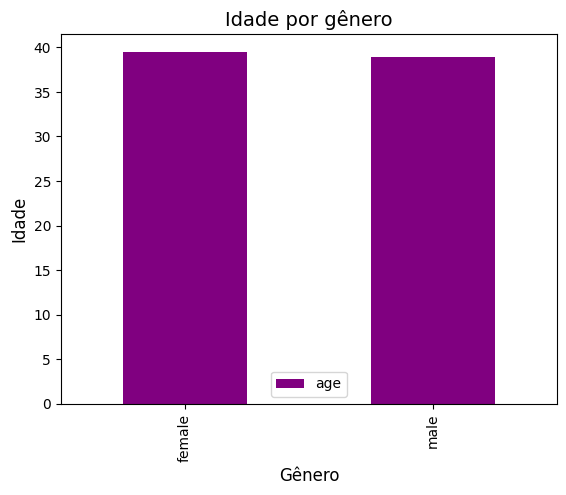

In [8]:
# Aqui visualizamos uma média da faixa etária de pessoas por sexo

sex_age = df_seguro.pivot_table(index='sex', values='age', aggfunc='mean')
ax_sex_age = sex_age.plot(kind='bar', color='purple')

ax_sex_age.set_xlabel("Gênero", fontsize = 12, rotation = 0)
ax_sex_age.set_ylabel("Idade", fontsize = 12)
ax_sex_age.set_title("Idade por gênero", fontsize = 14, rotation = 0)
ax_sex_age = ax_sex_age



In [7]:
# Conferindo os valores exatos para cada sexo
df_seguro.groupby('sex')['age'].mean()

sex
female    39.503021
male      38.917160
Name: age, dtype: float64

#### Matplotlib

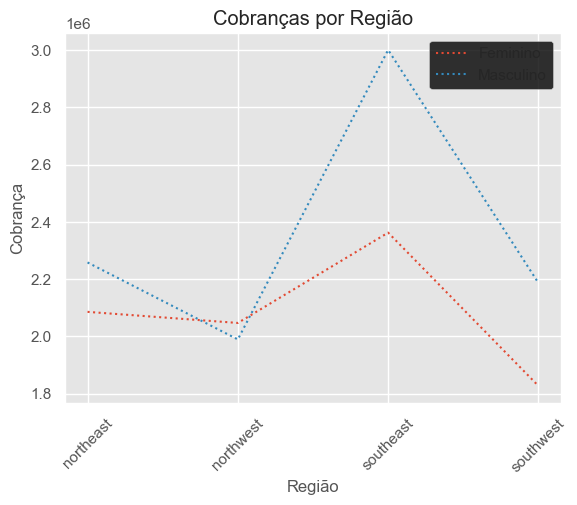

In [287]:
# Mostrando a tendência de cobranças por região para cada sexo

plt_seguro = df_seguro.pivot_table(index='region', columns='sex', values='charges', aggfunc='sum')
plt.plot(plt_seguro , ":" ,label=['Feminino','Masculino'],)
plt.title('Cobranças por Região')
plt.style.use('ggplot')
plt.xlabel('Região')
plt.ylabel('Cobrança')
plt.xticks(rotation=45)
plt.legend(facecolor='black')
plt_seguro = plt_seguro

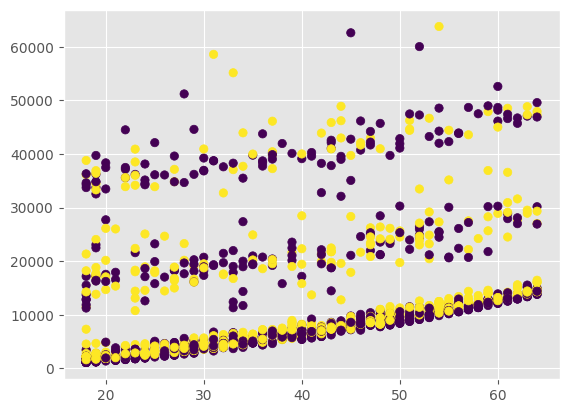

In [181]:
# A dispersão dos dados da idade em relação aos valores do seguro.
# As mulhers são as de cores amarela, os homens os de cores roxo.

df_seguro.loc[:, "sex_bin"] = df_seguro["sex"].map({"male": 0, "female": 1})
plt.scatter(data=df_seguro, x='age', y='charges', c=df_seguro['sex_bin'])
plt.show()

#### Seaborn

<AxesSubplot: xlabel='region', ylabel='charges'>

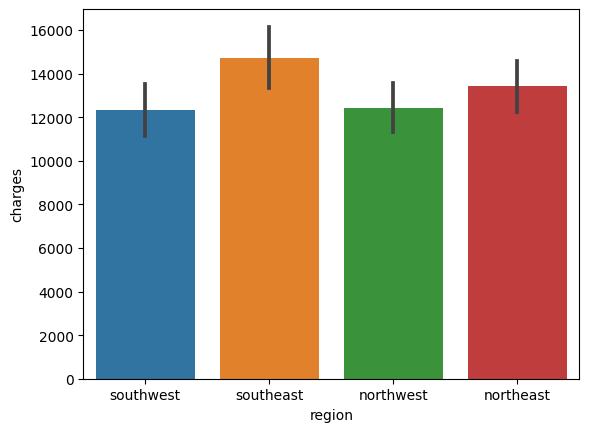

In [252]:
# Visualizando os valores cobrados por região
sns.barplot(x="region", y="charges", data=df_seguro)

<AxesSubplot: xlabel='age', ylabel='charges'>

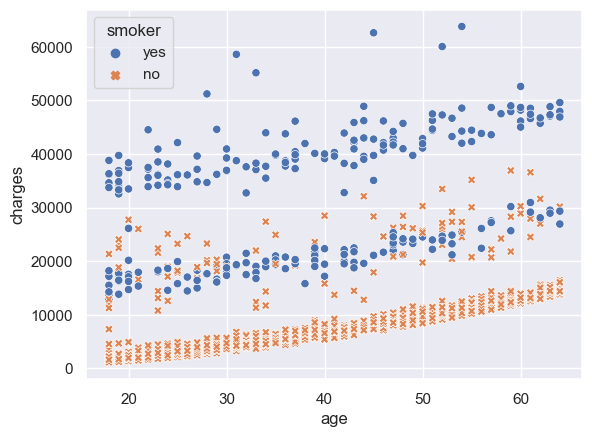

In [267]:
# mas não é só isso! Posso fazer um plot de relação 
sns.set_theme()
sns.scatterplot(x = "age", y = "charges", data = df_seguro, hue = "smoker", style = "smoker")

In [13]:
# Transformando os valores da coluna smoker em 0 para não fumante e 1 para fumantes
df_seguro['smoker_bin'] = df_seguro['smoker'].map({'yes':1, 'no':0})

#### Plotly

In [16]:
# Exibe um gráfico com a quantidade de não fumantes e a quantidade de fumantes
d = df_seguro.groupby('smoker')['region'].value_counts()
#ax = sns.countplot(x="smoker", data = df_seguro)
ax.set_xlabel('Fumantes')
ax.set_ylabel('Quantidade de fumantes')

ax = ax

Text(0.5, 1.0, 'Quantidade de fumantes e não fumantes')

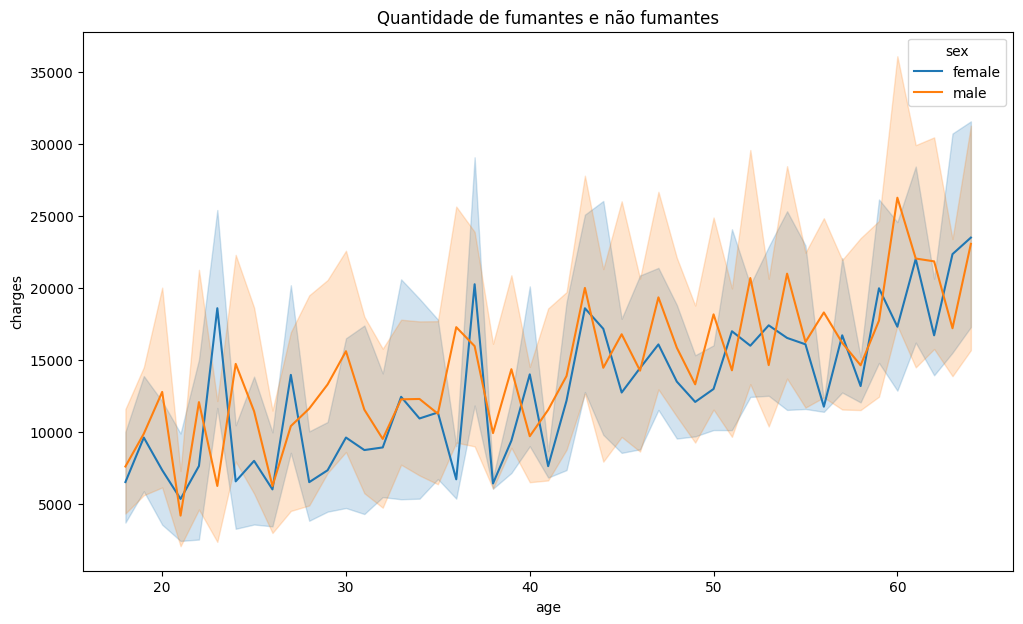

In [19]:
plt.figure(figsize= (12, 7))
ax = sns.lineplot(x = "age", y = "charges", hue = "sex", data = df_seguro)
ax.set_title('Quantidade de fumantes e não fumantes')


In [103]:
# Nesse gráfico podemos observar o índice de massa corporal das pessoas, por sexo em cada região dos EUA
df_seguro['teste'] = df_seguro.groupby('sex')['bmi'].sum()
ax = px.bar(data_frame=df_seguro, x='region', y='bmi', color='sex', barmode='group')
ax

In [244]:
# Valores pagos do seguro por sexo em cada estado
fig = px.bar(df_seguro, x="region", y=['bmi'], color='sex', barmode='group', title="Wide-Form Input")#barmode['stack', 'group', 'overlay', 'relative']
fig.show()

In [285]:
# Um somatório dos valores pagos do seguro por idade. 
import plotly.graph_objects as go

age = list(df_seguro['age'])
#bmi = list(df_seguro['bmi'])
charges = list(df_seguro['charges'])

fig = go.Figure(go.Bar(x = age, y = charges))

fig.update_layout(
    title={
        'text': "Valores pagos de seguro por idade",
        'x': 0.5,
        'font_size': 20
    },
    xaxis_title = {'text':'Idade', 'font_size': 18},
    yaxis_title = {'text':'Valor do seguro', 'font_size': 18},
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0.5,
        dtick = 0.75,
    ),

)

fig.show()

In [230]:
# Analizando o indice de massa corporal por idade
ax = px.scatter(data_frame=df_seguro, x='age', y='bmi', color='sex')
ax.update_layout(
    template='plotly_dark',
    xaxis_title = {'text':'Idade', 'font_size': 18},
    yaxis_title = {'text':'Massa corporal', 'font_size': 18},
    title={
        'text': "Massa corporal por Idade",
        'x': 0.5,
        'font_size': 20
    },
    legend_title={'text': 'sexo', 'font_size':18}

)